In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#"../dataset/v2_seperate/ecg.csv"
#"../dataset/v2_seperate/fnirs.csv"
#"../dataset/v2_seperate/mec.csv"
#"../dataset/v2_seperate/skin.csv"
#"../dataset/v2_seperate/survey.csv"
#"../dataset/v2_seperate/v2_eda.csv"
#"../dataset/v2_seperate/v2_original.csv"

df = pd.read_csv("../dataset/v2_seperate/v2_original.csv")

In [3]:
y = df['diagnosis_type'].values
y -= 1

df.drop(columns=['No', 'diagnosis', 'diagnosis_type'], inplace=True)

X = df.values

In [4]:
df

,Height,Weight,BMI,muscle_mass,body_fat_mass,body_fat_percentage,age,past_medical_history,dyspepsia_startdate,gi_endoscopy_date,...,W_Area_R_Right,Sys_rate_R_Right,H4/H1_R_Right,Wfb_ratio_R_Right,meanSys_area_R_Right,medSys_area_R_Right,meanPulseArea_R_Right,medPulseArea_R_Right,meanPulseWidth_R_Right,medPulseWidth_R_Right
0,157.9,53.4,21.4,20.4,15.6,29.2,50,14,2192,547,...,214.847,0.45,0.47,2.2849,1246.534,1294.731,1818.141674,1767.252,967.548,1147.687
1,154.6,59.3,24.8,19.8,21.9,37.0,60,14,1065,517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,164.0,72.7,27.0,23.0,30.4,41.8,50,14,1402,214,...,603.584,0.45,0.50,1.9694,3091.302,3131.550,4390.967337,4455.811,2248.437,2271.170
3,161.1,52.3,20.2,22.1,11.8,22.6,49,14,1949,236,...,480.577,0.40,0.56,1.7614,2715.069,2592.869,4499.700647,4504.887,1938.826,2098.553
4,150.1,46.7,20.7,16.9,14.6,31.3,58,14,1767,96,...,438.582,0.48,0.52,2.1558,2131.714,2216.248,2887.613241,3028.136,1384.499,1466.942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,166.3,82.7,29.9,32.9,24.3,29.4,55,14,731,73,...,867.607,0.41,0.62,1.0582,4736.863,4682.237,8014.687222,8023.351,2705.840,2715.463
96,158.8,66.7,26.4,22.4,25.3,37.9,47,14,1827,41,...,668.577,0.56,0.21,1.5402,4015.401,4213.085,4627.656245,4859.651,4117.797,4323.355
97,168.8,67.8,23.8,27.6,18.1,26.7,58,14,1827,248,...,503.962,0.40,0.47,1.9714,3044.279,3121.820,4727.637230,4766.751,2566.969,2634.788
98,156.8,59.4,24.2,21.2,20.1,33.9,51,14,1827,68,...,624.493,0.54,0.36,2.2505,3987.831,3992.146,5008.732318,4985.233,3472.657,3459.008


In [5]:
y

array([0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1], dtype=int64)

# XGBoost

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report
import numpy as np

#1557, 2356, 88848
seed_li = [1557, 2356, 88488, 616, 821]
result = 0

for seed in seed_li:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('xgb', XGBClassifier(
            objective='multi:softprob',
            use_label_encoder=False,
            eval_metric='mlogloss',
            random_state=42
        ))
    ])

    param_grid = {
        'xgb__n_estimators': [100, 200],
        'xgb__learning_rate': [0.01, 0.1],
        'xgb__max_depth': [3, 5],
        'xgb__subsample': [0.8, 1.0],
        'xgb__colsample_bytree': [0.8, 1.0],
        'xgb__gamma': [0, 1],
        'xgb__reg_lambda': [1, 5],
        'xgb__reg_alpha': [0, 1],
        'xgb__min_child_weight': [1, 5]
    }

    f1_scorer = make_scorer(f1_score, average='weighted')
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=f1_scorer,
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print("\n[GridSearchCV 결과]")
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV F1: {:.4f}".format(grid_search.best_score_))


    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    test_f1 = f1_score(y_test, y_pred, average='weighted')
    result += test_f1
    
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n[테스트 세트 성능]")
    print(f"Test F1: {test_f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

result = result / 5
print(result)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


KeyboardInterrupt: 

# CatBoost

In [7]:
#CATBOOST 

import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score, make_scorer
from catboost import CatBoostClassifier

result = 0

for seed in seed_li:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed
    )

    model = CatBoostClassifier(
        loss_function='MultiClass',
        random_seed=seed,
        verbose=0
    )

    param_grid = {
        'iterations': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [3, 5],
        'l2_leaf_reg': [1, 5],
        'random_strength': [1, 2], 
        'bagging_temperature': [0, 1], 
        'border_count': [32, 64], 
        'rsm': [0.8, 1.0],   
    }

    # weighted F1 score를 평가 지표로 사용하기 위한 scorer 생성
    f1_scorer = make_scorer(f1_score, average='weighted')

    # StratifiedKFold를 통한 교차검증 설정 (n_splits=5)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

    # GridSearchCV 설정: 모든 하이퍼파라미터 조합 평가
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=f1_scorer,
        cv=cv,
        n_jobs=-1,
        verbose=1
    )

    # Grid Search 수행
    grid_search.fit(X_train, y_train)

    # 최적의 파라미터와 점수 출력
    print("Best parameters found: ", grid_search.best_params_)
    print("Best  F1 score (CV): {:.4f}".format(grid_search.best_score_))

    # 테스트 세트에 대해 평가
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    result += test_f1
    print("Test set  F1 score: {:.4f}".format(test_f1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
result = result / 5
print(result)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters found:  {'bagging_temperature': 0, 'border_count': 64, 'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 1, 'rsm': 1.0}
Best  F1 score (CV): 0.6500
Test set  F1 score: 0.7031

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       1.00      0.60      0.75         5
           2       0.50      0.56      0.53         9

    accuracy                           0.70        30
   macro avg       0.75      0.66      0.69        30
weighted avg       0.72      0.70      0.70        30

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters found:  {'bagging_temperature': 0, 'border_count': 32, 'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 2, 'rsm': 0.8}
Best  F1 score (CV): 0.6000
Test set  F1 score: 0.6937

Cla

c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Best parameters found:  {'bagging_temperature': 0, 'border_count': 64, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 2, 'rsm': 1.0}
Best  F1 score (CV): 0.5655
Test set  F1 score: 0.6043

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.00      0.00      0.00         5
           2       0.60      0.67      0.63         9

    accuracy                           0.67        30
   macro avg       0.43      0.51      0.47        30
weighted avg       0.55      0.67      0.60        30

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Best parameters found:  {'bagging_temperature': 0, 'border_count': 32, 'depth': 5, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 2, 'rsm': 1.0}
Best  F1 score (CV): 0.5879
Test set  F1 score: 0.5082

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.00      0.00      0.00         4
           2       0.36      0.56      0.43         9

    accuracy                           0.53        30
   macro avg       0.35      0.40      0.37        30
weighted avg       0.50      0.53      0.51        30

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\carly\anaconda3\envs\dyspepsia_research\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Best parameters found:  {'bagging_temperature': 0, 'border_count': 64, 'depth': 3, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 1, 'rsm': 0.8}
Best  F1 score (CV): 0.6163
Test set  F1 score: 0.6196

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.00      0.00      0.00         3
           2       0.45      0.62      0.53         8

    accuracy                           0.63        30
   macro avg       0.41      0.45      0.43        30
weighted avg       0.61      0.63      0.62        30

0.625775753315799


# SHAP

In [8]:
import shap
model = best_model
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)  # (n_samples, n_classes, n_features)
X_test_df = pd.DataFrame(X_test, columns= df.columns.tolist())

n_classes = shap_values.shape[2]

shap_values.shape

(30, 373, 3)

In [ ]:
import shap
import matplotlib.pyplot as plt

# ------------------------------
# 1) SHAP 계산 (멀티클래스)
# ------------------------------
explainer = shap.TreeExplainer(model)
shap_values_exp = explainer(X_test_df)  # -> shape: (n_samples, n_features, n_classes)라고 가정

# shap_values_exp가 Explanation일 수도 있고, 이미 np.ndarray일 수도 있으므로 체크
if hasattr(shap_values_exp, "values"):
    shap_values_array = shap_values_exp.values  # np.ndarray, shape: (n_samples, n_features, n_classes)
    base_values = shap_values_exp.base_values   # shape: (n_samples, n_classes) or (n_classes,)
else:
    shap_values_array = shap_values_exp         # 이미 ndarray
    base_values = explainer.expected_value      # shape가 (n_classes,) or (n_samples, n_classes)

print("shap_values_array.shape =", shap_values_array.shape)
print("base_values.shape =", getattr(base_values, "shape", "scalar_or_none"))

# ------------------------------
# 2) 특정 샘플, 특정 클래스 선택
# ------------------------------
print(y_test)

sample_idx = 10
class_idx  = 2

true_label = y_test[sample_idx]
print("Sample 10의 실제 클래스 =", true_label)

# "특정 클래스"의 SHAP만 떼어내면 (n_samples, n_features)
shap_values_for_class = shap_values_array[..., class_idx]

# 그 중 특정 샘플은 (n_features,)
shap_values_for_sample = shap_values_for_class[sample_idx, :]

# ------------------------------
# 3) base_value(스칼라) 추출
# ------------------------------
# (1) base_values가 (n_classes,)라면 -> base_values[class_idx]
# (2) base_values가 (n_samples, n_classes)라면 -> base_values[sample_idx, class_idx]

if base_values.ndim == 1:
    # ex) shape == (n_classes,)
    base_value_for_sample = base_values[class_idx]
else:
    # ex) shape == (n_samples, n_classes)
    base_value_for_sample = base_values[sample_idx, class_idx]

# ------------------------------
# 4) features도 (n_features,) 형태로
# ------------------------------
sample_feature_values = X_test_df.iloc[sample_idx, :]  # Series, length=n_features

# ------------------------------
# 5) force_plot (shap 0.20+)
# ------------------------------
force_plot = shap.plots.force(
    base_value=base_value_for_sample,      # float
    shap_values=shap_values_for_sample,    # (n_features,)
    features=sample_feature_values,        # (n_features,)
    feature_names=sample_feature_values.index,
    link="logit"  # 분류라면 logit을 종종 사용 (확률 대신 로짓 스케일)
)
shap.save_html("force_plot_sample10_class1.html", force_plot)


shap_values_array.shape = (30, 373, 3)
base_values.shape = (30, 3)
[2 2 0 0 0 0 2 2 2 0 1 2 0 0 0 0 1 0 2 0 0 0 0 0 2 0 1 0 0 0]
Sample 10의 실제 클래스 = 1


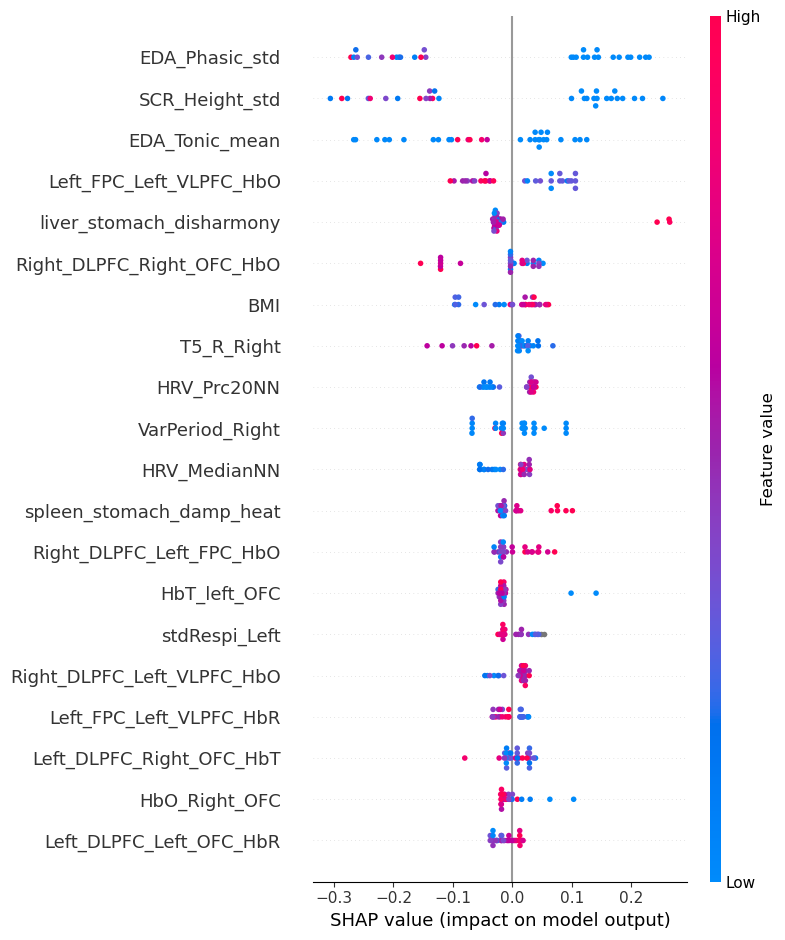

In [12]:
# 특정 클래스(class_idx)의 SHAP 값 추출 (shape: (n_samples, n_features))
shap_values_for_class = shap_values_array[..., class_idx]

# Summary plot 생성
shap.summary_plot(shap_values_for_class, X_test_df, feature_names=X_test_df.columns)
